## Loading the Libraries and Dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Importing dataset
folder_path = "dataset/"
train_x_file = "AMF_train_X_XCZw8r3.csv"
train_y_file = "AMF_train_Y_omYQJZL.csv"
test_x_file = "AMF_test_X_uDs0jHH.csv"
train_X = pd.read_csv(folder_path + train_x_file)
train_y = pd.read_csv(folder_path + train_y_file)
test_X = pd.read_csv(folder_path + test_x_file)

In [5]:
# Merging train data X and y
train_df = train_X.merge(train_y, on='Trader')

## Some visualization

In [6]:
train_df.head(5)

Index    Share      Day     Trader       OTR        OCR         OMR  \
0      1   Isin_8  Date_24  Trader_10  2.272727   8.333333   12.500000   
1      2  Isin_87  Date_29  Trader_10  1.696629  25.166667   21.571429   
2      3  Isin_87  Date_23  Trader_10  1.482759  47.300000  118.250000   
3      4  Isin_12  Date_11  Trader_10  1.705882  14.500000   29.000000   
4      5  Isin_87   Date_9  Trader_10  1.517730  26.750000         NaN   

   min_time_two_events  mean_time_two_events  10_p_time_two_events  ...  \
0                  0.0           5117.830300              0.000000  ...   
1                  0.0           1846.968401              0.000074  ...   
2                  0.0            686.300630              0.000071  ...   
3                  0.0           2174.335265              0.000000  ...   
4                  0.0            944.008551              0.000071  ...   

   mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
0              NaN             NaN             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN              NaN   
3              NaN             NaN             NaN              NaN   
4              NaN             NaN             NaN              NaN   

   med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0             NaN             NaN              NaN             NaN   
1             NaN             NaN              NaN             NaN   
2             NaN             NaN              NaN             NaN   
3             NaN             NaN              NaN             NaN   
4             NaN             NaN              NaN             NaN   

   NbSecondWithAtLeatOneTrade     type  
0                           4  NON HFT  
1                          15  NON HFT  
2                          63  NON HFT  
3                           4  NON HFT  
4                          38  NON HFT  

[5 rows x 40 columns]

In [7]:
train_df.info(), train_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105782 entries, 0 to 105781
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Index                       105782 non-null  int64  
 1   Share                       105782 non-null  object 
 2   Day                         105782 non-null  object 
 3   Trader                      105782 non-null  object 
 4   OTR                         104099 non-null  float64
 5   OCR                         105782 non-null  float64
 6   OMR                         58170 non-null   float64
 7   min_time_two_events         105782 non-null  float64
 8   mean_time_two_events        105782 non-null  float64
 9   10_p_time_two_events        105782 non-null  float64
 10  med_time_two_events         105782 non-null  float64
 11  25_p_time_two_events        105782 non-null  float64
 12  75_p_time_two_events        105782 non-null  float64
 13  90_p_time_two_

(None, (105782, 40))

In [8]:
np.unique(train_df['type'], return_counts=True)

(array(['HFT', 'MIX', 'NON HFT'], dtype=object), array([31950, 51483, 22349]))

## Exploration

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Number of lines for each trader

In [10]:
traders = train_df.Trader.unique()
traders_count={}
for trader in traders:
    traders_count[trader] = len(train_df.loc[train_df.Trader == trader])
values = list(traders_count.values())
stats = "max="+str(max(values))+"\nmin="+str(min(values))+"\navg="+str(np.mean(values))+"\nmedian="+str(np.median(values))
print(stats)

max=10208
min=1
avg=1230.0232558139535
median=324.5


Le nombre de lignes par trader est trop différent pour espérer simplement concaténer les features pour chaque trader

Average line counts: 
HFT=2130.0
MIX=2145.125
NON_HFT=475.51063829787233


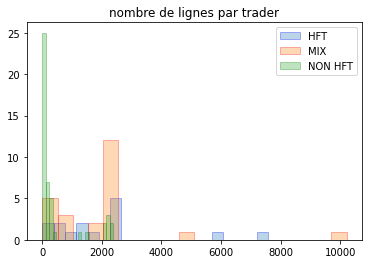

In [11]:
hft_counts = train_df.loc[train_df.type == 'HFT'].groupby('Trader').count().Index
mix_counts = train_df.loc[train_df.type == 'MIX'].groupby('Trader').count().Index
nnhft_counts = train_df.loc[train_df.type == 'NON HFT'].groupby('Trader').count().Index

plt.hist(hft_counts, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix_counts,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft_counts,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title("nombre de lignes par trader")

stats = "Average line counts: \n"+"HFT="+str(np.mean(hft_counts))+"\nMIX="+str(np.mean(mix_counts))+"\nNON_HFT="+str(np.mean(nnhft_counts))
print(stats)

Le nombre de lignes par traders donne une information intéressante pour reconnaître les NON HFT

### Representations of data that seem meaningful

#### Average max_time_two_events for each trader

Average max_time_two_events: 
HFT=8353.977697461392
MIX=18182.144739900723
NON_HFT=18943.22311245693


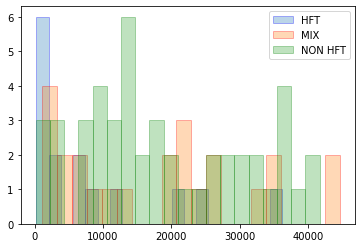

In [12]:
hft_means = train_df.loc[train_df.type == 'HFT'].groupby('Trader').mean().max_time_two_events
mix_means = train_df.loc[train_df.type == 'MIX'].groupby('Trader').mean().max_time_two_events
nnhft_means = train_df.loc[train_df.type == 'NON HFT'].groupby('Trader').mean().max_time_two_events

plt.hist(hft_means, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix_means,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft_means,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

stats = "Average max_time_two_events: \n"+"HFT="+str(np.mean(hft_means))+"\nMIX="+str(np.mean(mix_means))+"\nNON_HFT="+str(np.mean(nnhft_means))
print(stats)

On a une information intéressante pour reconnaître les HFT

#### Average mean_lifetime_cancel for each trader

Average max_time_two_events: 
HFT=2616.041243135174
MIX=3169.554193030602
NON_HFT=10638.500983608243


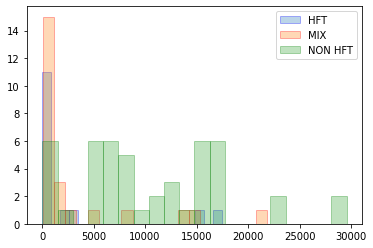

In [13]:
hft_means = train_df.loc[train_df.type == 'HFT'].groupby('Trader').mean().mean_lifetime_cancel
mix_means = train_df.loc[train_df.type == 'MIX'].groupby('Trader').mean().mean_lifetime_cancel
nnhft_means = train_df.loc[train_df.type == 'NON HFT'].groupby('Trader').mean().mean_lifetime_cancel

plt.hist(hft_means, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix_means,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft_means,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

stats = "Average max_time_two_events: \n"+"HFT="+str(np.mean(hft_means))+"\nMIX="+str(np.mean(mix_means))+"\nNON_HFT="+str(np.mean(nnhft_means))
print(stats)

## Visualization per type

### OCR

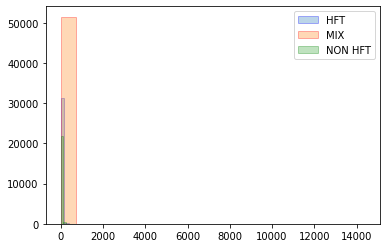

In [14]:
hft = train_df.loc[train_df.type == 'HFT'].OCR
mix = train_df.loc[train_df.type == 'MIX'].OCR
nnhft = train_df.loc[train_df.type == 'NON HFT'].OCR

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()


On a un gros problème d'outliers qui écrasent la représentation. Seules 75 lignes sont au dessus de 1000 pour tous les traders

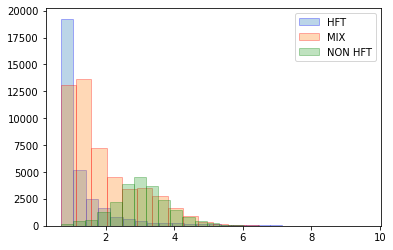

In [15]:
fixed_df = train_df
hft = fixed_df.loc[(train_df.type == 'HFT')].OCR
mix = fixed_df.loc[(train_df.type == 'MIX')].OCR
nnhft = fixed_df.loc[train_df.type == 'NON HFT'].OCR

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

On se rend compte que la distrib est à peu près exponentielle pour HFT et MIX. Il est intéressant de prendre le log de cette grandeur

### OTR 

Text(0.5, 1.0, 'OTR')

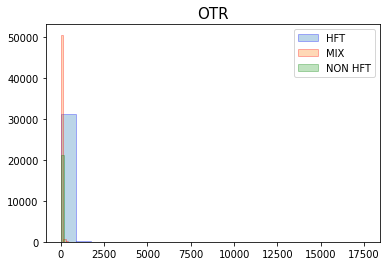

In [16]:
hft = train_df.loc[train_df.type == 'HFT'].OTR
mix = train_df.loc[train_df.type == 'MIX'].OTR
nnhft = train_df.loc[train_df.type == 'NON HFT'].OTR

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title('OTR',{'fontsize':15})

Text(0.5, 1.0, 'log(OTR)')

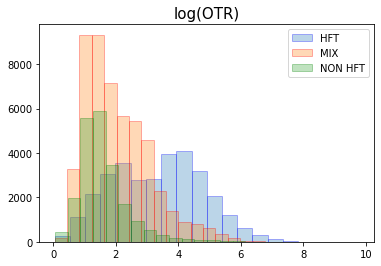

In [17]:
fixed_df = train_df.loc[train_df.OCR < 1000]
hft = fixed_df.loc[(train_df.type == 'HFT')].OTR
mix = fixed_df.loc[(train_df.type == 'MIX')].OTR
nnhft = fixed_df.loc[train_df.type == 'NON HFT'].OTR

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title('log(OTR)',{'fontsize':15})

Idem à OCR

### OMR

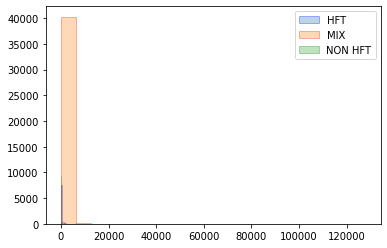

In [18]:
hft = train_df.loc[train_df.type == 'HFT'].OMR
mix = train_df.loc[train_df.type == 'MIX'].OMR
nnhft = train_df.loc[train_df.type == 'NON HFT'].OMR

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

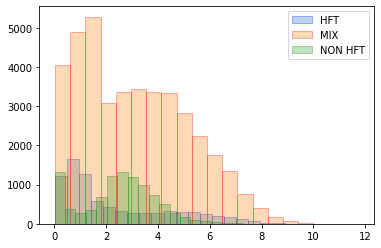

In [19]:
hft = train_df.loc[(train_df.type == 'HFT')].OMR
mix = train_df.loc[(train_df.type == 'MIX')].OMR
nnhft = train_df.loc[train_df.type == 'NON HFT'].OMR

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

idem otr

### min_time_two_events

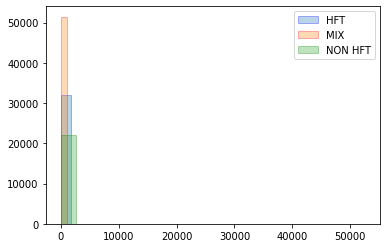

In [20]:
hft = train_df.loc[train_df.type == 'HFT'].min_time_two_events
mix = train_df.loc[train_df.type == 'MIX'].min_time_two_events
nnhft = train_df.loc[train_df.type == 'NON HFT'].min_time_two_events

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

presque toutes les valeurs sont nulles

### 10_p_time_two_events

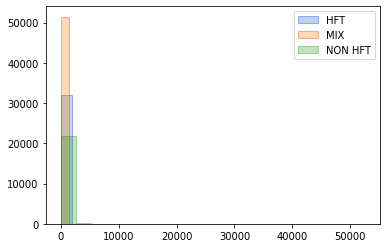

In [21]:
hft = train_df.loc[train_df.type == 'HFT']['10_p_time_two_events']
mix = train_df.loc[train_df.type == 'MIX']['10_p_time_two_events']
nnhft = train_df.loc[train_df.type == 'NON HFT']['10_p_time_two_events']

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

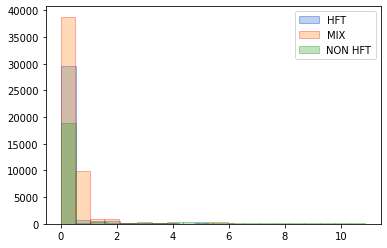

In [22]:
hft = train_df.loc[train_df.type == 'HFT']['10_p_time_two_events']
mix = train_df.loc[train_df.type == 'MIX']['10_p_time_two_events']
nnhft = train_df.loc[train_df.type == 'NON HFT']['10_p_time_two_events']

plt.hist(np.log1p(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log1p(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log1p(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Comme le min

### Proportion de valeurs inférieures à 1 par trader de chaque classe

In [23]:
trader = 'Trader_10'
num_zeros=train_df.loc[(train_df.type == "NON HFT") & (train_df.Trader == trader) & (train_df.min_time_two_events<1)].count().Index
tot_lignes=len(train_df.loc[train_df.Trader == trader])
print(num_zeros,tot_lignes)

75 77


Text(0.5, 1.0, 'min_time_two_events \nproportion de 0 par trader')

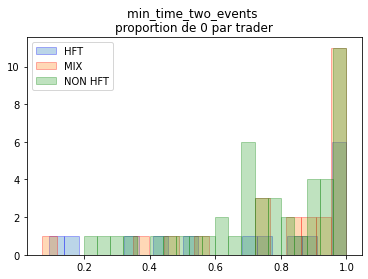

In [24]:
proportion_trader_mix = {}
proportion_trader_hft = {}
proportion_trader_nnhft = {}

traders = train_df.Trader.unique()
for trader in traders:
    proportion_trader_mix[trader] = train_df.loc[(train_df.type == "MIX") & (train_df.Trader == trader) & (train_df.min_time_two_events<=0)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_hft[trader] = train_df.loc[(train_df.type == "HFT") & (train_df.Trader == trader) & (train_df.min_time_two_events<=0)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_nnhft[trader] = train_df.loc[(train_df.type == "NON HFT") & (train_df.Trader == trader) & (train_df.min_time_two_events<=0)].count().Index / len(train_df.loc[(train_df.Trader == trader)])

hft = list(proportion_trader_hft.values())
mix = list(proportion_trader_mix.values())
nnhft = list(proportion_trader_nnhft.values())

hft = [a for a in hft if a > 0]
mix = [a for a in mix if a > 0]
nnhft = [a for a in nnhft if a > 0]

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title('min_time_two_events \nproportion de 0 par trader')

In [25]:
print(np.mean(hft),np.mean(mix),np.mean(nnhft))

0.7155730758077421 0.8304208939104704 0.758821370350147


Text(0.5, 1.0, 'min_time_two_events \nproportion de 0 par trader')

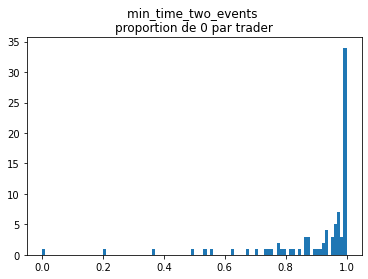

In [26]:
proportion_trader= {}


traders = train_df.Trader.unique()
for trader in traders:
    proportion_trader[trader] = train_df.loc[(train_df.Trader == trader) & (train_df.min_time_two_events<1)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
proportions = list(proportion_trader.values())
plt.hist(proportions,bins = 100)
plt.title('min_time_two_events \nproportion de 0 par trader')

### mean_time_two_events

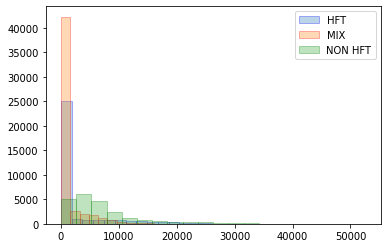

In [27]:
filtered_df = train_df

hft = filtered_df.loc[train_df.type == 'HFT'].mean_time_two_events
mix = filtered_df.loc[train_df.type == 'MIX'].mean_time_two_events
nnhft = filtered_df.loc[train_df.type == 'NON HFT'].mean_time_two_events

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

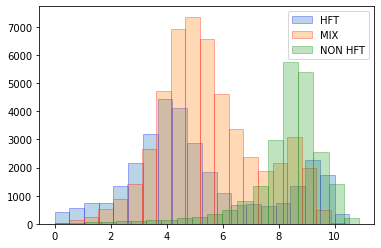

In [28]:
filtered_df = train_df

hft = filtered_df.loc[train_df.type == 'HFT'].mean_time_two_events
mix = filtered_df.loc[train_df.type == 'MIX'].mean_time_two_events
nnhft = filtered_df.loc[train_df.type == 'NON HFT'].mean_time_two_events

plt.hist(np.log1p(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log1p(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log1p(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Prendre le log +1

### Proportion de zéros par trader

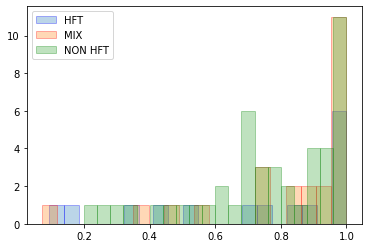

In [29]:
proportion_trader_mix = {}
proportion_trader_hft = {}
proportion_trader_nnhft = {}

traders = train_df.Trader.unique()
for trader in traders:
    proportion_trader_mix[trader] = train_df.loc[(train_df.type == "MIX") & (train_df.Trader == trader) & (train_df.min_time_two_events<=0)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_hft[trader] = train_df.loc[(train_df.type == "HFT") & (train_df.Trader == trader) & (train_df.min_time_two_events<=0)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_nnhft[trader] = train_df.loc[(train_df.type == "NON HFT") & (train_df.Trader == trader) & (train_df.min_time_two_events<=0)].count().Index / len(train_df.loc[(train_df.Trader == trader)])

hft = list(proportion_trader_hft.values())
mix = list(proportion_trader_mix.values())
nnhft = list(proportion_trader_nnhft.values())

hft = [a for a in hft if a > 0]
mix = [a for a in mix if a > 0]
nnhft = [a for a in nnhft if a > 0]

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

C'est pareil que min_time_two events et plutôt nul. On peut supprimer l'une des deux colonnes

### med_time_two_events

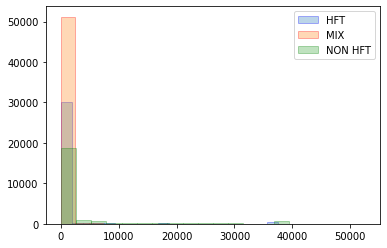

In [30]:
filtered_df = train_df
hft = filtered_df.loc[train_df.type == 'HFT'].med_time_two_events
mix = filtered_df.loc[train_df.type == 'MIX'].med_time_two_events
nnhft = filtered_df.loc[train_df.type == 'NON HFT'].med_time_two_events

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

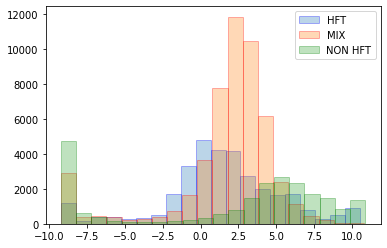

In [31]:
filtered_df = train_df
hft = filtered_df.loc[train_df.type == 'HFT'].med_time_two_events
mix = filtered_df.loc[train_df.type == 'MIX'].med_time_two_events
nnhft = filtered_df.loc[train_df.type == 'NON HFT'].med_time_two_events

plt.hist(np.log(hft+1e-4), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix+1e-4),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft+1e-4),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

On prend le log+petite valeur (1e-4)

### max_time_two_events

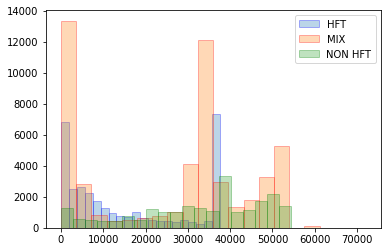

In [32]:
hft = train_df.loc[train_df.type == 'HFT'].max_time_two_events
mix = train_df.loc[train_df.type == 'MIX'].max_time_two_events
nnhft = train_df.loc[train_df.type == 'NON HFT'].max_time_two_events

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

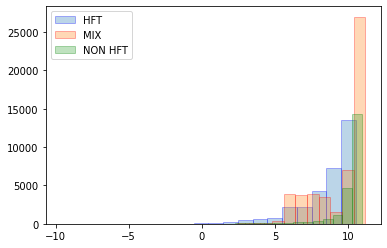

In [33]:
hft = train_df.loc[train_df.type == 'HFT'].max_time_two_events
mix = train_df.loc[train_df.type == 'MIX'].max_time_two_events
nnhft = train_df.loc[train_df.type == 'NON HFT'].max_time_two_events

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

laisser tel quel

### 90_p_time_two_events

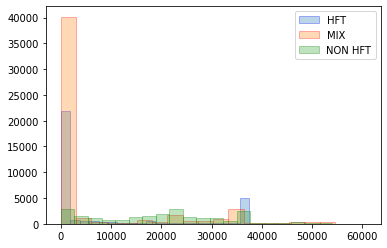

In [34]:
hft = train_df.loc[train_df.type == 'HFT']['90_p_time_two_events']
mix = train_df.loc[train_df.type == 'MIX']['90_p_time_two_events']
nnhft = train_df.loc[train_df.type == 'NON HFT']['90_p_time_two_events']

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

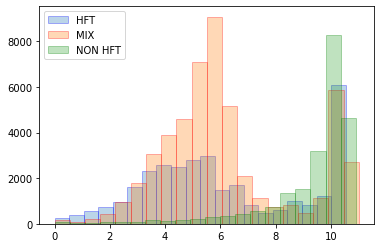

In [35]:
hft = train_df.loc[train_df.type == 'HFT']['90_p_time_two_events']
mix = train_df.loc[train_df.type == 'MIX']['90_p_time_two_events']
nnhft = train_df.loc[train_df.type == 'NON HFT']['90_p_time_two_events']

plt.hist(np.log1p(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log1p(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log1p(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Prendre le log +1

### min_lifetime_cancel

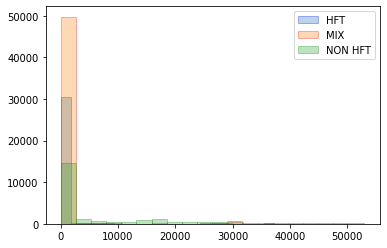

In [36]:
hft = train_df.loc[train_df.type == 'HFT'].min_lifetime_cancel
mix = train_df.loc[train_df.type == 'MIX'].min_lifetime_cancel
nnhft = train_df.loc[train_df.type == 'NON HFT'].min_lifetime_cancel

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

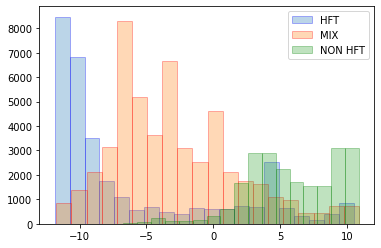

In [37]:
hft = train_df.loc[train_df.type == 'HFT'].min_lifetime_cancel
mix = train_df.loc[train_df.type == 'MIX'].min_lifetime_cancel
nnhft = train_df.loc[train_df.type == 'NON HFT'].min_lifetime_cancel

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

On prend le log.

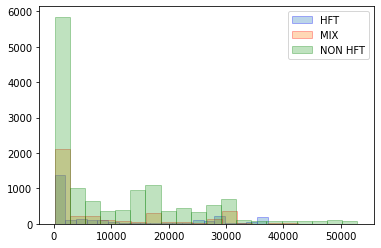

In [38]:
filtered_df = train_df.loc[train_df.min_lifetime_cancel > 100]

hft = filtered_df.loc[train_df.type == 'HFT'].min_lifetime_cancel
mix = filtered_df.loc[train_df.type == 'MIX'].min_lifetime_cancel
nnhft = filtered_df.loc[train_df.type == 'NON HFT'].min_lifetime_cancel

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

### mean_lifetime_cancel

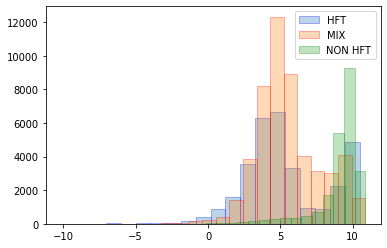

In [39]:
hft = train_df.loc[train_df.type == 'HFT'].mean_lifetime_cancel
mix = train_df.loc[train_df.type == 'MIX'].mean_lifetime_cancel
nnhft = train_df.loc[train_df.type == 'NON HFT'].mean_lifetime_cancel

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

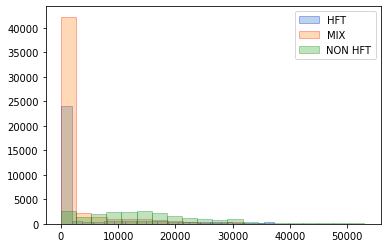

In [40]:
hft = train_df.loc[train_df.type == 'HFT'].mean_lifetime_cancel
mix = train_df.loc[train_df.type == 'MIX'].mean_lifetime_cancel
nnhft = train_df.loc[train_df.type == 'NON HFT'].mean_lifetime_cancel

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

On prend le log

### med_lifetime_cancel

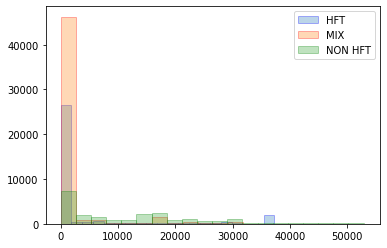

In [41]:
hft = train_df.loc[train_df.type == 'HFT'].med_lifetime_cancel
mix = train_df.loc[train_df.type == 'MIX'].med_lifetime_cancel
nnhft = train_df.loc[train_df.type == 'NON HFT'].med_lifetime_cancel

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

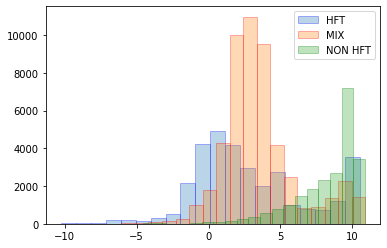

In [42]:
hft = train_df.loc[train_df.type == 'HFT'].med_lifetime_cancel
mix = train_df.loc[train_df.type == 'MIX'].med_lifetime_cancel
nnhft = train_df.loc[train_df.type == 'NON HFT'].med_lifetime_cancel

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

On prend le log

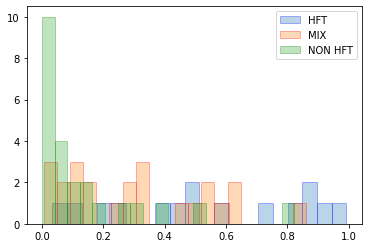

In [43]:
proportion_trader_mix = {}
proportion_trader_hft = {}
proportion_trader_nnhft = {}

traders = train_df.Trader.unique()
for trader in traders:
    proportion_trader_mix[trader] = train_df.loc[(train_df.type == "MIX") & (train_df.Trader == trader) & (train_df.med_lifetime_cancel<=10)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_hft[trader] = train_df.loc[(train_df.type == "HFT") & (train_df.Trader == trader) & (train_df.med_lifetime_cancel<=10)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_nnhft[trader] = train_df.loc[(train_df.type == "NON HFT") & (train_df.Trader == trader) & (train_df.med_lifetime_cancel<=10)].count().Index / len(train_df.loc[(train_df.Trader == trader)])

hft = list(proportion_trader_hft.values())
mix = list(proportion_trader_mix.values())
nnhft = list(proportion_trader_nnhft.values())

hft = [a for a in hft if a > 0]
mix = [a for a in mix if a > 0]
nnhft = [a for a in nnhft if a > 0]

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

#### La proportion de 0 n'est pas très intéressante pour ces trois grandeurs.

### 90_p_lifetime_cancel

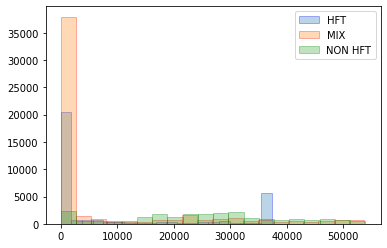

In [44]:
hft = train_df.loc[train_df.type == 'HFT']['90_p_lifetime_cancel']
mix = train_df.loc[train_df.type == 'MIX']['90_p_lifetime_cancel']
nnhft = train_df.loc[train_df.type == 'NON HFT']['90_p_lifetime_cancel']

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

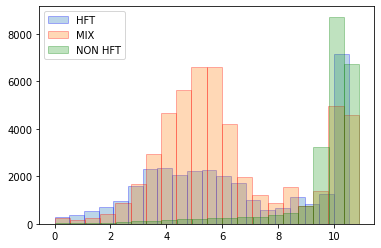

In [45]:
hft = train_df.loc[train_df.type == 'HFT']['90_p_lifetime_cancel']
mix = train_df.loc[train_df.type == 'MIX']['90_p_lifetime_cancel']
nnhft = train_df.loc[train_df.type == 'NON HFT']['90_p_lifetime_cancel']

plt.hist(np.log1p(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log1p(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log1p(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

On prend le log + 1 

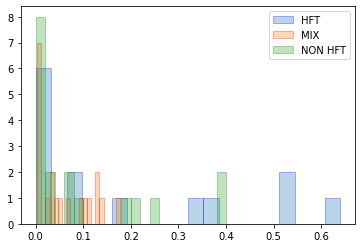

In [46]:
proportion_trader_mix = {}
proportion_trader_hft = {}
proportion_trader_nnhft = {}

traders = train_df.Trader.unique()
for trader in traders:
    proportion_trader_mix[trader] = train_df.loc[(train_df.type == "MIX") & (train_df.Trader == trader) & (train_df['90_p_lifetime_cancel']<10)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_hft[trader] = train_df.loc[(train_df.type == "HFT") & (train_df.Trader == trader) & (train_df['90_p_lifetime_cancel']<10)].count().Index / len(train_df.loc[(train_df.Trader == trader)])
    proportion_trader_nnhft[trader] = train_df.loc[(train_df.type == "NON HFT") & (train_df.Trader == trader) & (train_df['90_p_lifetime_cancel']<10)].count().Index / len(train_df.loc[(train_df.Trader == trader)])

hft = list(proportion_trader_hft.values())
mix = list(proportion_trader_mix.values())
nnhft = list(proportion_trader_nnhft.values())

hft = [a for a in hft if a > 0]
mix = [a for a in mix if a > 0]
nnhft = [a for a in nnhft if a > 0]

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

#### La prop de 0 peut être pas mal

### NbSecondWithAtLeatOneTrade

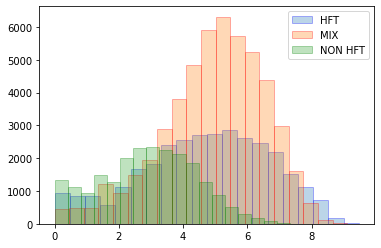

In [47]:
hft = train_df.loc[train_df.type == 'HFT'].NbSecondWithAtLeatOneTrade
mix = train_df.loc[train_df.type == 'MIX'].NbSecondWithAtLeatOneTrade
nnhft = train_df.loc[train_df.type == 'NON HFT'].NbSecondWithAtLeatOneTrade

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

prendre le log

### NbTradeVenueMic

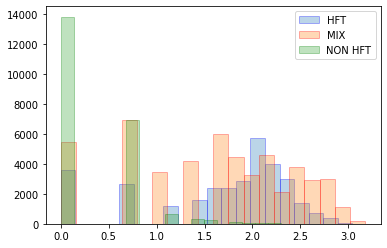

In [48]:
hft = train_df.loc[train_df.type == 'HFT'].NbTradeVenueMic
mix = train_df.loc[train_df.type == 'MIX'].NbTradeVenueMic
nnhft = train_df.loc[train_df.type == 'NON HFT'].NbTradeVenueMic

plt.hist(np.log(hft), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

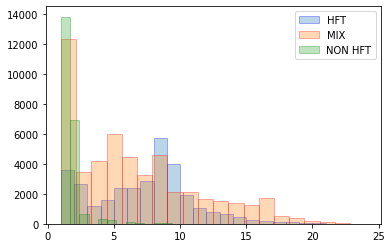

In [49]:
hft = train_df.loc[train_df.type == 'HFT'].NbTradeVenueMic
mix = train_df.loc[train_df.type == 'MIX'].NbTradeVenueMic
nnhft = train_df.loc[train_df.type == 'NON HFT'].NbTradeVenueMic

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

laisser tel quel

### MaxNbTradesBySecond

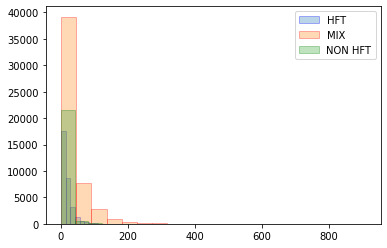

In [50]:
hft = train_df.loc[train_df.type == 'HFT'].MaxNbTradesBySecond
mix = train_df.loc[train_df.type == 'MIX'].MaxNbTradesBySecond
nnhft = train_df.loc[train_df.type == 'NON HFT'].MaxNbTradesBySecond

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

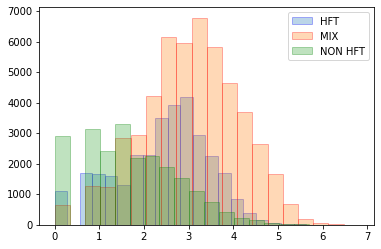

In [51]:
hft_max = train_df.loc[train_df.type == 'HFT'].MaxNbTradesBySecond
mix_max = train_df.loc[train_df.type == 'MIX'].MaxNbTradesBySecond
nnhft_max = train_df.loc[train_df.type == 'NON HFT'].MaxNbTradesBySecond

plt.hist(np.log(hft_max), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_max),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_max),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

prendre le log

### MeanNbTradesBySecond

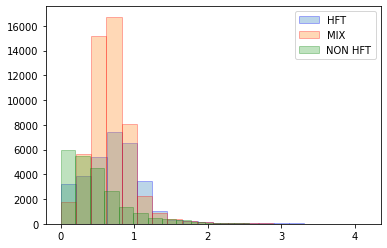

In [52]:
hft_mean = train_df.loc[train_df.type == 'HFT'].MeanNbTradesBySecond
mix_mean = train_df.loc[train_df.type == 'MIX'].MeanNbTradesBySecond
nnhft_mean = train_df.loc[train_df.type == 'NON HFT'].MeanNbTradesBySecond

plt.hist(np.log(hft_mean), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

idem prendre le log

### MaxNbTradesBySecond - MeanNbTradesBySecond

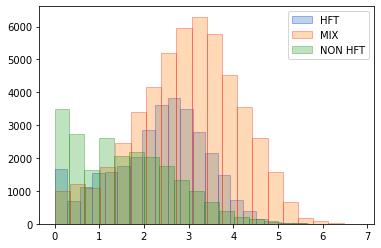

In [53]:
hft_max = train_df.loc[train_df.type == 'HFT'].MaxNbTradesBySecond
mix_max = train_df.loc[train_df.type == 'MIX'].MaxNbTradesBySecond
nnhft_max = train_df.loc[train_df.type == 'NON HFT'].MaxNbTradesBySecond

plt.hist(np.log(hft_max - hft_mean +1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_max - mix_mean +1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_max- nnhft_mean +1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

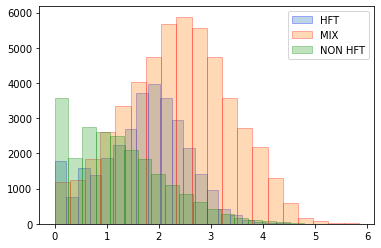

In [54]:
hft_max = train_df.loc[train_df.type == 'HFT'].MaxNbTradesBySecond
mix_max = train_df.loc[train_df.type == 'MIX'].MaxNbTradesBySecond
nnhft_max = train_df.loc[train_df.type == 'NON HFT'].MaxNbTradesBySecond

plt.hist(np.log(hft_max/hft_mean), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_max/mix_mean),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_max/nnhft_mean),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

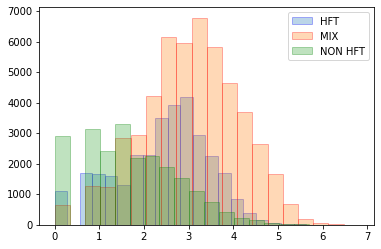

In [55]:
plt.hist(np.log(hft_max), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_max),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_max),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

rien à en tirer. C'est la même chose que max tout seul

### min_dt_TV1

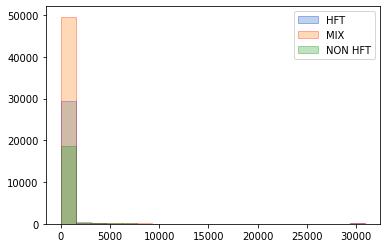

In [56]:
hft_min = train_df.loc[train_df.type == 'HFT'].min_dt_TV1
mix_min = train_df.loc[train_df.type == 'MIX'].min_dt_TV1
nnhft_min = train_df.loc[train_df.type == 'NON HFT'].min_dt_TV1

plt.hist(hft_min, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix_min,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft_min,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

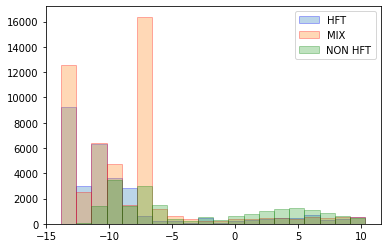

In [57]:
plt.hist(np.log(hft_min), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_min),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_min),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

prendre le log

### mean_dt_TV1

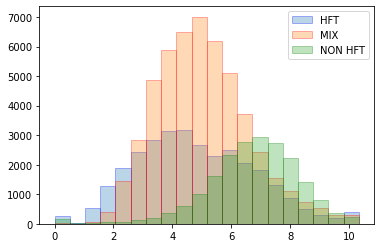

In [58]:
hft_mean = train_df.loc[train_df.type == 'HFT'].mean_dt_TV1
mix_mean = train_df.loc[train_df.type == 'MIX'].mean_dt_TV1
nnhft_mean = train_df.loc[train_df.type == 'NON HFT'].mean_dt_TV1

plt.hist(np.log(hft_mean+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

prendre le log +1

### Soustraction mean-min

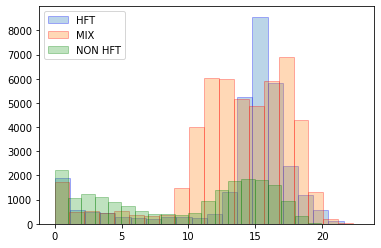

In [59]:
plt.hist(np.log(hft_mean/hft_min), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean/mix_min),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean/nnhft_min),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

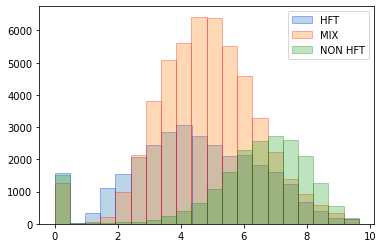

In [60]:
plt.hist(np.log(hft_mean-hft_min +1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean-mix_min+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean-nnhft_min+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

On n'a pas d'infos supp

### med_dt_TV1

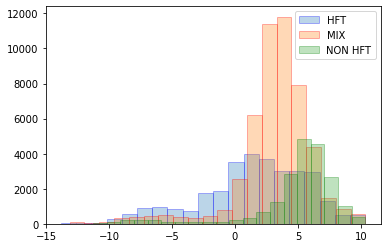

In [69]:
hft_med = train_df.loc[train_df.type == 'HFT'].med_dt_TV1
mix_med = train_df.loc[train_df.type == 'MIX'].med_dt_TV1
nnhft_med = train_df.loc[train_df.type == 'NON HFT'].med_dt_TV1

plt.hist(np.log(hft_med), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_med),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_med),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Prendre le log +1

### Difference mean-med

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


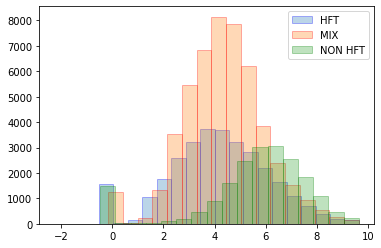

In [72]:
plt.hist(np.log1p(hft_mean-hft_med), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log1p(mix_mean-mix_med),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log1p(nnhft_mean-nnhft_med),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Ca ne permet pas de mieux séparer

### min_dt_TV1_TV2

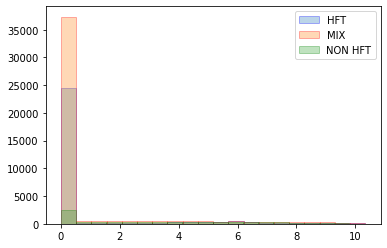

In [64]:
hft_min = train_df.loc[train_df.type == 'HFT'].min_dt_TV1_TV2
mix_min = train_df.loc[train_df.type == 'MIX'].min_dt_TV1_TV2
nnhft_min = train_df.loc[train_df.type == 'NON HFT'].min_dt_TV1_TV2

plt.hist(np.log(hft_min+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_min+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_min+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

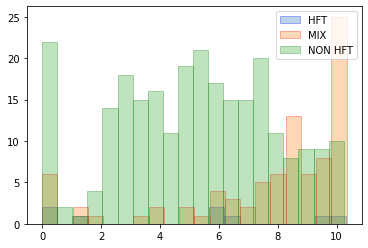

In [65]:
filtered_df = train_df.loc[train_df.min_time_two_events > 10]

hft_mean = filtered_df.loc[train_df.type == 'HFT'].min_dt_TV1_TV2
mix_mean = filtered_df.loc[train_df.type == 'MIX'].min_dt_TV1_TV2
nnhft_mean = filtered_df.loc[train_df.type == 'NON HFT'].min_dt_TV1_TV2

plt.hist(np.log(hft_mean+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

En dehors des 0 c'est pas si mal. Mais fonctionne sur un nombre très faible de ligne :/

==> transformation inutile

### mean_dt_TV1_TV2

Text(0.5, 1.0, 'log(mean_dt_TV1_TV2)')

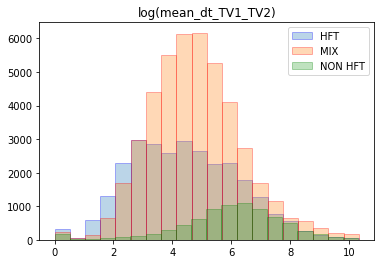

In [66]:
hft_mean = train_df.loc[train_df.type == 'HFT'].mean_dt_TV1_TV2
mix_mean = train_df.loc[train_df.type == 'MIX'].mean_dt_TV1_TV2
nnhft_mean = train_df.loc[train_df.type == 'NON HFT'].mean_dt_TV1_TV2

plt.hist(np.log(hft_mean+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title("log(mean_dt_TV1_TV2)")

prendre le log +1

### med_dt_TV1_TV2

Text(0.5, 1.0, 'log(med_dt_TV1_TV2)')

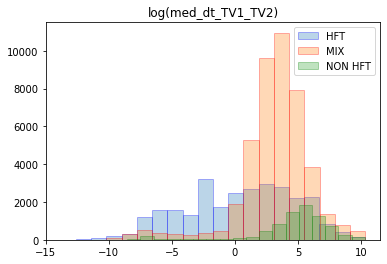

In [70]:
hft_med = train_df.loc[train_df.type == 'HFT'].med_dt_TV1_TV2
mix_med = train_df.loc[train_df.type == 'MIX'].med_dt_TV1_TV2
nnhft_med = train_df.loc[train_df.type == 'NON HFT'].med_dt_TV1_TV2

plt.hist(np.log(hft_med), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_med),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_med),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title("log(med_dt_TV1_TV2)")

In [76]:
print(np.sum(np.isnan(hft_med))/len(hft_med))
print(np.sum(np.isnan(mix_med))/len(mix_med))
print(np.sum(np.isnan(nnhft_med))/len(nnhft_med))

0.12184663536776213
0.12872210244158266
0.6557787820484138


### Difference

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


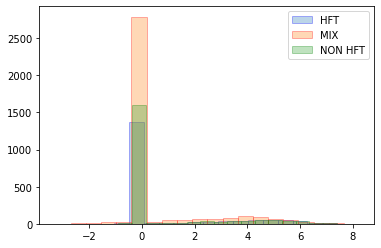

In [84]:
plt.hist(np.log(hft_med - hft_mean +1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_med - mix_mean +1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_med - nnhft_mean+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

nul

Text(0.5, 1.0, 'log(med) - log(min)')

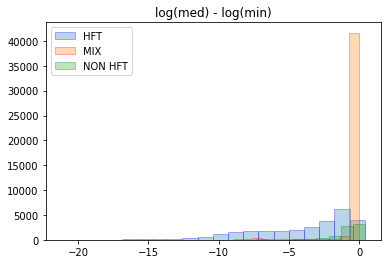

In [90]:
plt.hist(np.log(hft_med) - np.log(hft_mean +1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_med) - np.log(mix_med +1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_med) - np.log(nnhft_mean +1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title("log(med) - log(min)")

pas mal !

### min_dt_TV1_TV3

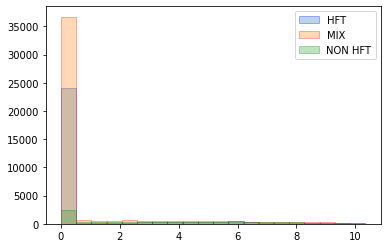

In [91]:
hft_min = train_df.loc[train_df.type == 'HFT'].min_dt_TV1_TV3
mix_min = train_df.loc[train_df.type == 'MIX'].min_dt_TV1_TV3
nnhft_min = train_df.loc[train_df.type == 'NON HFT'].min_dt_TV1_TV3

plt.hist(np.log(hft_min+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_min+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_min+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

### mean_dt_TV1_TV3

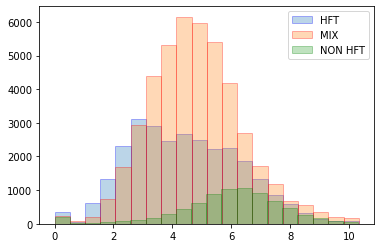

In [93]:
hft_mean = train_df.loc[train_df.type == 'HFT'].mean_dt_TV1_TV3
mix_mean = train_df.loc[train_df.type == 'MIX'].mean_dt_TV1_TV3
nnhft_mean = train_df.loc[train_df.type == 'NON HFT'].mean_dt_TV1_TV3

plt.hist(np.log(hft_mean+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

### med_dt_TV1_TV3

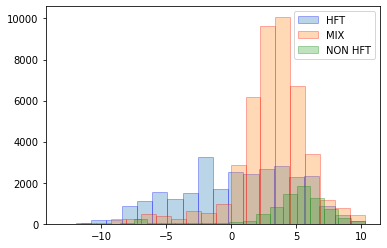

In [94]:
hft_med = train_df.loc[train_df.type == 'HFT'].med_dt_TV1_TV3
mix_med = train_df.loc[train_df.type == 'MIX'].med_dt_TV1_TV3
nnhft_med = train_df.loc[train_df.type == 'NON HFT'].med_dt_TV1_TV3

plt.hist(np.log(hft_med), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_med),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_med),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Text(0.5, 1.0, 'log(med) - log(min)')

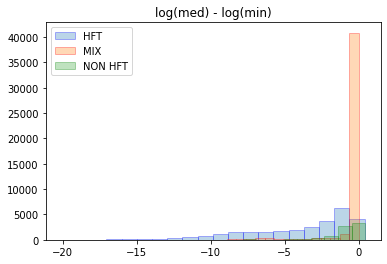

In [95]:
plt.hist(np.log(hft_med) - np.log(hft_mean +1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_med) - np.log(mix_med +1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_med) - np.log(nnhft_mean +1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()
plt.title("log(med) - log(min)")

Résultat indentique à TV1-TV2

### min_dt_TV1_TV4

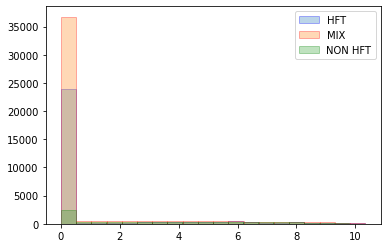

In [125]:
hft_min = train_df.loc[train_df.type == 'HFT'].min_dt_TV1_TV4
mix_min = train_df.loc[train_df.type == 'MIX'].min_dt_TV1_TV4
nnhft_min = train_df.loc[train_df.type == 'NON HFT'].min_dt_TV1_TV4

plt.hist(np.log(hft_min+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_min+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_min+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

### med_dt_TV1_TV4

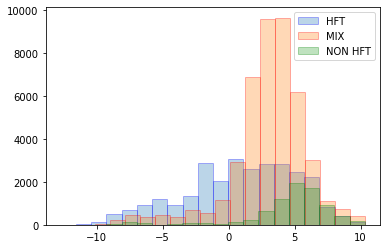

In [129]:
hft_med = train_df.loc[train_df.type == 'HFT'].med_dt_TV1_TV4
mix_med = train_df.loc[train_df.type == 'MIX'].med_dt_TV1_TV4
nnhft_med = train_df.loc[train_df.type == 'NON HFT'].med_dt_TV1_TV4

plt.hist(np.log(hft_med), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_med),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_med),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

### mean_dt_TV1_TV4

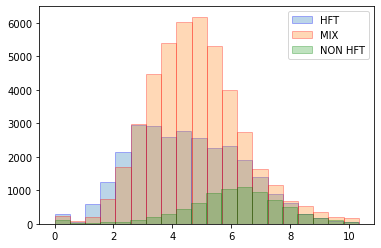

In [130]:
hft_mean = train_df.loc[train_df.type == 'HFT'].mean_dt_TV1_TV4
mix_mean = train_df.loc[train_df.type == 'MIX'].mean_dt_TV1_TV4
nnhft_mean = train_df.loc[train_df.type == 'NON HFT'].mean_dt_TV1_TV4

plt.hist(np.log(hft_mean+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix_mean+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft_mean+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

### min_time_two_events

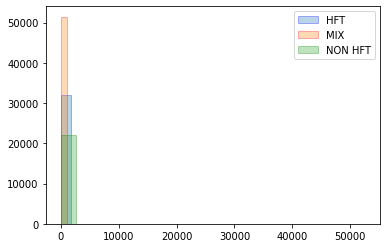

In [20]:
hft = train_df.loc[train_df.type == 'HFT'].min_time_two_events
mix = train_df.loc[train_df.type == 'MIX'].min_time_two_events
nnhft = train_df.loc[train_df.type == 'NON HFT'].min_time_two_events

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

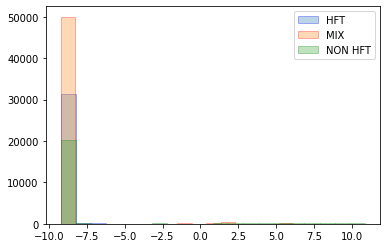

In [23]:
plt.hist(np.log(hft+1e-4), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix+1e-4),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft+1e-4),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Presque que des 0

### 25_p_time_two_events

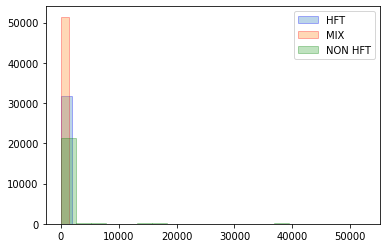

In [25]:
hft = train_df.loc[train_df.type == 'HFT']['25_p_time_two_events']
mix = train_df.loc[train_df.type == 'MIX']['25_p_time_two_events']
nnhft = train_df.loc[train_df.type == 'NON HFT']['25_p_time_two_events']

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

idem presque que des 0

### 75_p_time_two_events

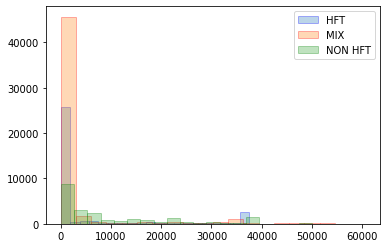

In [27]:
hft = train_df.loc[train_df.type == 'HFT']['75_p_time_two_events']
mix = train_df.loc[train_df.type == 'MIX']['75_p_time_two_events']
nnhft = train_df.loc[train_df.type == 'NON HFT']['75_p_time_two_events']

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

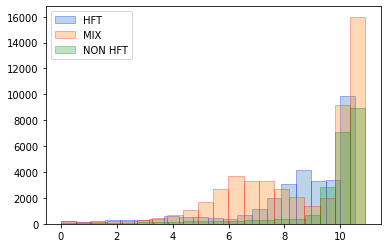

In [32]:
plt.hist(np.log(hft+1), bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(np.log(mix+1),bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(np.log(nnhft+1),bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Prendre le log+1

### max_lifetime_cancel

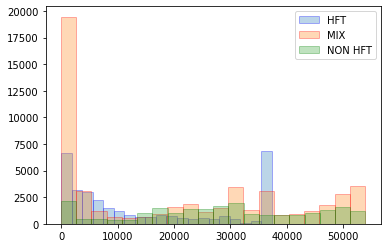

In [30]:
hft = train_df.loc[train_df.type == 'HFT']['max_lifetime_cancel']
mix = train_df.loc[train_df.type == 'MIX']['max_lifetime_cancel']
nnhft = train_df.loc[train_df.type == 'NON HFT']['max_lifetime_cancel']

plt.hist(hft, bins=20, alpha=0.3, label ="HFT", edgecolor = 'blue')
plt.hist(mix,bins=20, alpha=0.3, label="MIX", edgecolor = 'red')
plt.hist(nnhft,bins=20, alpha=0.3, label="NON HFT", edgecolor = 'green')
plt.legend()

Garder tel quel

## Conclusion :

Prendre le log + petite valeur pour beaucoup de grandeurs : <br>
OCR,OTR,OMR,NbSecondWithAtLeatOneTrade,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,med_dt_TV1_TV2,med_dt_TV1_TV3,med_dt_TV1_TV4,min_lifetime_cancel,mean_lifetime_cancel,med_lifetime_cancel,med_time_two_events
<br>

    
Prendre le log + 1 pour : <br>
mean_dt_TV1,mean_dt_TV1_TV2,mean_dt_TV1_TV3,mean_dt_TV1_TV4,90_p_lifetime_cancel,90_p_time_two_events,mean_time_two_events

Les colonnes min et 10p sont à éliminer en priorité sauf min_lifetime_cancel et min_dt_TV1 dans une moindre mesure

Colonnes à ne pas toucher :<br>
-NbTradeVenueMic <br>
-max_time_two_events

In [10]:
log_cols = ['OCR','OTR','NbSecondWithAtLeatOneTrade','MaxNbTradesBySecond','MeanNbTradesBySecond','min_lifetime_cancel','mean_lifetime_cancel','med_time_two_events','TV_mean_med_difference','med_lifetime_cancel','med_dt_TV1_TV2']
log_plus_one_cols=['mean_dt_TV1','mean_dt_TV1_TV2','90_p_time_two_events','mean_time_two_events', '75_p_time_two_events','75_p_lifetime_cancel','med_dt_TV1']
identity_cols=['NbTradeVenueMic','max_time_two_events', 'max_lifetime_cancel', '10_p_lifetime_cancel']

print(len(log_cols)+len(log_plus_one_cols)+len(identity_cols))

to_del=['min_dt_TV1','OMR','25_p_time_two_events', '10_p_time_two_events', 'min_dt_TV1_TV4', 'min_time_two_events', 'min_dt_TV1_TV2', 'min_dt_TV1_TV3',
                  '90_p_lifetime_cancel','med_dt_TV1_TV3', 'med_dt_TV1_TV4','25_p_lifetime_cancel','mean_dt_TV1_TV3','mean_dt_TV1_TV4']

kept = log_cols+log_plus_one_cols+identity_cols

all_cols = train_X.columns

to_keep = [(col) for col in all_cols if (col not in to_del and col not in kept)]

to_remove = [(col) for col in kept if (col in to_del)]

print(to_keep)

print('\n')

print(to_remove)

22
['Index', 'Share', 'Day', 'Trader']


[]
